# Machine Learning

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

plt.rcParams["figure.figsize"] = (15,8)

In [136]:
df = pd.read_csv("movies.csv")
df

,title,time,genre,rating,description,votes,directors,stars,year,gross
0,#Home,158,Drama,8.9,Oliver Twist (Indrans) wants to be tech-savvy ...,12361,['Rojin Thomas'],"['Indrans', 'Sreenath Bhasi', 'Manju Pillai', ...",2021,NaN
1,#Saraitda,98,Action,6.3,The rapid spread of an unknown infection has l...,37072,['Il Cho'],"['Yoo Ah-in', 'Park Shin-Hye', 'Jeon Bae-soo',...",2020,NaN
2,'71,99,Action,7.2,"In 1971, a young and disoriented British soldi...",55642,['Yann Demange'],"[""Jack O'Connell"", 'Sam Reid', 'Sean Harris', ...",2014,1270000.0
3,'A' gai wak,105,Action,7.3,Fighting against pirates at the turn of the 20...,16657,"['Jackie Chan', 'Jackie Chan']","['Sammo Kam-Bo Hung', 'Jackie Chan', 'Sammo Ka...",1983,NaN
4,'A' gai wak 2,106,Action,7.0,Dragon is now transferred to be the police hea...,10180,['Jackie Chan'],"['Jackie Chan', 'Maggie Cheung', 'Rosamund Kwa...",1987,NaN
...,...,...,...,...,...,...,...,...,...,...
9684,È stata la mano di Dio,130,Drama,7.3,"In 1980s Naples, young Fabietto pursues his lo...",37807,['Paolo Sorrentino'],"['Filippo Scotti', 'Toni Servillo', 'Teresa Sa...",2021,NaN
9685,Ôdishon,115,Drama,7.1,A widower takes an offer to screen girls at a ...,79633,['Takashi Miike'],"['Ryo Ishibashi', 'Eihi Shiina', 'Tetsu Sawaki...",1999,NaN
9686,Ôkami kodomo no Ame to Yuki,117,Animation,8.1,After her werewolf lover unexpectedly dies in ...,43791,['Mamoru Hosoda'],"['Aoi Miyazaki', 'Takao Osawa', 'Haru Kuroki',...",2012,NaN
9687,Ölümlü Dünya,107,Action,7.6,Mermer Family lives a double life working at t...,26066,['Ali Atay'],"['Ahmet Mümtaz Taylan', 'Alper Kul', 'Sarp Apa...",2018,NaN


In [137]:
df_gross = df.dropna()
df_gross

,title,time,genre,rating,description,votes,directors,stars,year,gross
2,'71,99,Action,7.2,"In 1971, a young and disoriented British soldi...",55642,['Yann Demange'],"[""Jack O'Connell"", 'Sam Reid', 'Sean Harris', ...",2014,1270000.0
5,'Breaker' Morant,107,Drama,7.8,Three Australian lieutenants are court martial...,13395,['Bruce Beresford'],"['Edward Woodward', 'Jack Thompson', 'John Wat...",1980,7140000.0
6,(500) Days of Summer,95,Comedy,7.7,After being dumped by the girl he believes to ...,502301,['Marc Webb'],"['Zooey Deschanel', 'Joseph Gordon-Levitt', 'G...",2009,32390000.0
8,*batteries not included,106,Comedy,6.6,Aliens help a feisty old New York couple in th...,35247,['Matthew Robbins'],"['Hume Cronyn', 'Jessica Tandy', 'Frank McRae'...",1987,32950000.0
9,...E tu vivrai nel terrore! L'aldilà,87,Horror,6.6,A young woman inherits an old hotel in Louisia...,22413,['Lucio Fulci'],"['Catriona MacColl', 'David Warbeck', 'Cinzia ...",1981,120000.0
...,...,...,...,...,...,...,...,...,...,...
9677,À la folie... pas du tout,92,Romance,7.1,A young woman who is in love with a married do...,18944,['Laetitia Colombani'],"['Audrey Tautou', 'Samuel Le Bihan', 'Isabelle...",2002,1010000.0
9678,À ma soeur!,95,Drama,6.4,Two sisters confront their sexual attitudes an...,11616,['Catherine Breillat'],"['Anaïs Reboux', 'Roxane Mesquida', 'Libero De...",2001,720000.0
9679,Átame!,101,Comedy,7.0,An unbalanced but alluring former mental patie...,28908,['Pedro Almodóvar'],"['Victoria Abril', 'Antonio Banderas', 'Loles ...",1989,4090000.0
9680,Æon Flux,93,Action,5.4,Æon Flux is a mysterious assassin working for ...,127584,['Karyn Kusama'],"['Charlize Theron', 'Frances McDormand', 'Soph...",2005,25860000.0


## Linear regression
Predict the rating by the time, votes, year and gross, using linear regression model.

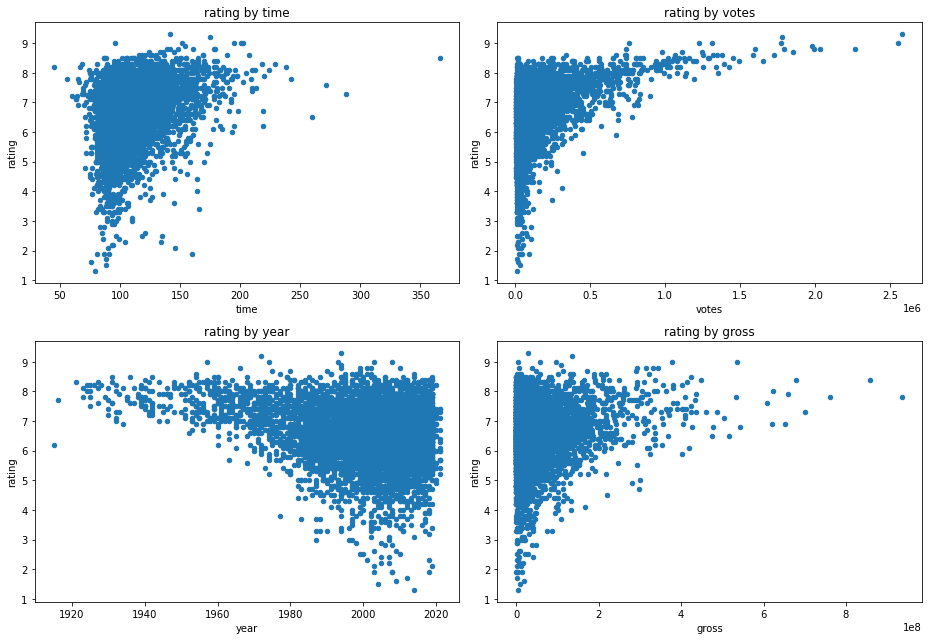

In [138]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(9)
fig.set_figwidth(13)
df_gross.sort_values("time").plot.scatter(x="time", y="rating", ax=axes[0,0], legend=False)
axes[0,0].set_title("rating by time")
df_gross.sort_values("votes").plot.scatter(x="votes", y="rating", ax=axes[0,1], legend=False)
axes[0,1].set_title("rating by votes")
df_gross.sort_values("year").plot.scatter(x="year", y="rating", ax=axes[1,0], legend=False)
axes[1,0].set_title("rating by year")
df_gross.sort_values("gross").plot.scatter(x="gross", y="rating", ax=axes[1,1], legend=False)
axes[1,1].set_title("rating by gross")
fig.tight_layout()

In [139]:
X = df_gross[["time", "votes", "year", "gross"]]
y = df_gross["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
predictions = reg.predict(X_test)
error = np.abs(predictions - y_test)
result = pd.DataFrame(data=dict(rating=y_test, predictions=predictions, error=error))
result

,rating,predictions,error
6356,6.8,6.534366,0.265634
8434,8.0,8.132290,0.132290
1985,7.7,7.494621,0.205379
7536,6.5,6.156107,0.343893
390,7.3,6.880865,0.419135
...,...,...,...
3449,7.4,5.929159,1.470841
4911,5.1,6.487214,1.387214
9530,6.9,6.269404,0.630596
9046,6.7,6.074125,0.625875


In [140]:
print("Average error:", error.mean())

Average error: 0.6122957688625549


## Decision tree
Predict the rating by the time, votes, year and gross, using decision tree model.

In [141]:
X = df_gross.loc[:, ["time", "votes", "year", "gross"]]
X["genre"] = pd.factorize(df_gross["genre"])[0].tolist()
y = df_gross["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = tree.DecisionTreeRegressor(min_samples_split=100)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
error = np.abs(predictions - y_test)
result = pd.DataFrame(data=dict(rating=y_test, predictions=predictions, error=error))
result

,rating,predictions,error
7470,7.2,7.443750,0.243750
9134,6.7,6.760674,0.060674
3006,7.3,7.391860,0.091860
8520,8.4,7.991892,0.408108
6259,7.6,7.681609,0.081609
...,...,...,...
5869,5.2,5.548214,0.348214
1783,5.6,6.614516,1.014516
8486,6.8,6.730263,0.069737
222,6.8,6.760674,0.039326


In [142]:
print("Average error:", error.mean())

Average error: 0.563433166856492


[Text(0.4896694214876033, 0.9375, 'X[0] <= 110.5\nsquared_error = 0.917\nsamples = 5740\nvalue = 6.589'),
 Text(0.20867768595041322, 0.8125, 'X[2] <= 1979.5\nsquared_error = 0.919\nsamples = 3410\nvalue = 6.336'),
 Text(0.06611570247933884, 0.6875, 'X[2] <= 1967.5\nsquared_error = 0.381\nsamples = 223\nvalue = 7.318'),
 Text(0.03305785123966942, 0.5625, 'X[0] <= 85.5\nsquared_error = 0.188\nsamples = 109\nvalue = 7.615'),
 Text(0.01652892561983471, 0.4375, 'squared_error = 0.187\nsamples = 31\nvalue = 7.365'),
 Text(0.049586776859504134, 0.4375, 'squared_error = 0.154\nsamples = 78\nvalue = 7.714'),
 Text(0.09917355371900827, 0.5625, 'X[1] <= 22463.5\nsquared_error = 0.4\nsamples = 114\nvalue = 7.034'),
 Text(0.08264462809917356, 0.4375, 'squared_error = 0.318\nsamples = 51\nvalue = 6.71'),
 Text(0.11570247933884298, 0.4375, 'squared_error = 0.312\nsamples = 63\nvalue = 7.297'),
 Text(0.3512396694214876, 0.6875, 'X[1] <= 175456.5\nsquared_error = 0.884\nsamples = 3187\nvalue = 6.267'),

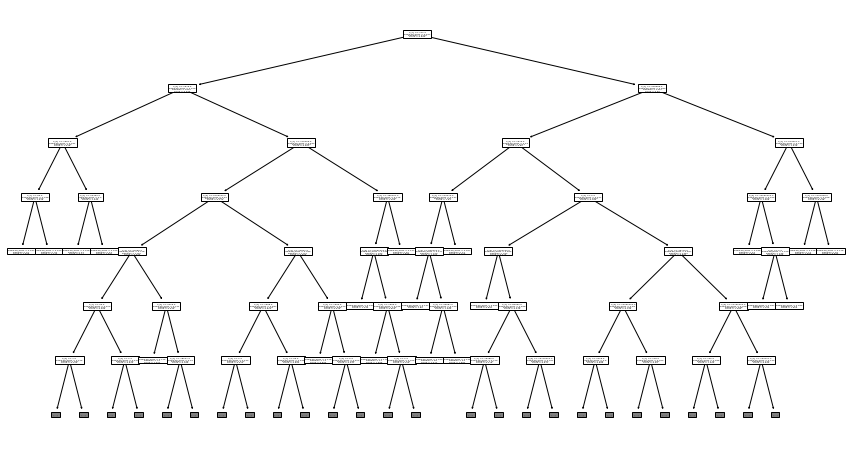

In [143]:
tree.plot_tree(clf, max_depth=6)

## Random forest
This is an ensemble of decision trees - the result is a combination of all of them.

In [148]:
regr = RandomForestRegressor(min_samples_split=100)
regr.fit(X_train, y_train)
predictions = regr.predict(X_test)
error = np.abs(predictions - y_test)
result = pd.DataFrame(data=dict(rating=y_test, predictions=predictions, error=error))
result

,rating,predictions,error
7470,7.2,6.995913,0.204087
9134,6.7,6.637579,0.062421
3006,7.3,7.244176,0.055824
8520,8.4,8.290824,0.109176
6259,7.6,7.354832,0.245168
...,...,...,...
5869,5.2,5.733342,0.533342
1783,5.6,6.329847,0.729847
8486,6.8,6.424261,0.375739
222,6.8,6.782324,0.017676


In [149]:
print("Average error:", error.mean())

Average error: 0.5153856119361094


## Conclusion
We examined three algorithms: linear regression. decision tree and random forest.

The results are error of about 0.5-0.6, which is pretty good.

Random forest is the best of them.